<a href="https://colab.research.google.com/github/sathvikabm/HW3-PredictiveAnalytics/blob/main/PA_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# HW3 Predictive Analytics
# Step 1: Problem Statement
# Q1 - Lung_Cancer Prediction - Lung Cancer Prediction Air Pollution, Alcohol, Smoking & Risk of Lung Cancer
# The dataset contains information on patients with lung cancer, including their age, gender, air pollution exposure, alcohol use, dust allergy,
# occupational hazards, genetic risk, chronic lung disease, balanced diet, obesity, smoking, passive smoker, chest pain, coughing of blood, fatigue,
# weight loss ,shortness of breath ,wheezing ,swallowing difficulty ,clubbing of finger nails and snoring

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
import pandas as pd

In [6]:
# Here is the website - https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/data
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Step 2: Data Collection
file_path = '/content/drive/My Drive/Dataset_LungCancer/dataset.csv'

In [8]:
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   Obesity  Smoking  Passive Smoker  Chest Pain  Coughing of B

In [9]:
# Printing the total number of rows and columns in the dataset
print(f"The dataset has {df.shape[0]} rows (data points) and {df.shape[1]} columns (features).")

The dataset has 1000 rows (data points) and 26 columns (features).


In [10]:
# Step 3: Data cleaning, Validation, Preprocessing

# Step a: Handling Missing Values - Dropping rows with any missing values
df = df.dropna()

# Step b: Removing Duplicates - Dropping duplicate rows if any
df = df.drop_duplicates()

# Step c: Correcting Data Errors - This step is subjective and might require domain knowledge
# For example, ensuring that age is a reasonable value
df = df[(df['Age'] <= 100) & (df['Age'] > 0)]

# Display cleaned data
print(df.head())
print(f"The cleaned dataset has {df.shape[0]} rows (data points) and {df.shape[1]} columns (features).")

   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   Obesity  Smoking  Passive Smoker  Chest Pain  Coughing of B

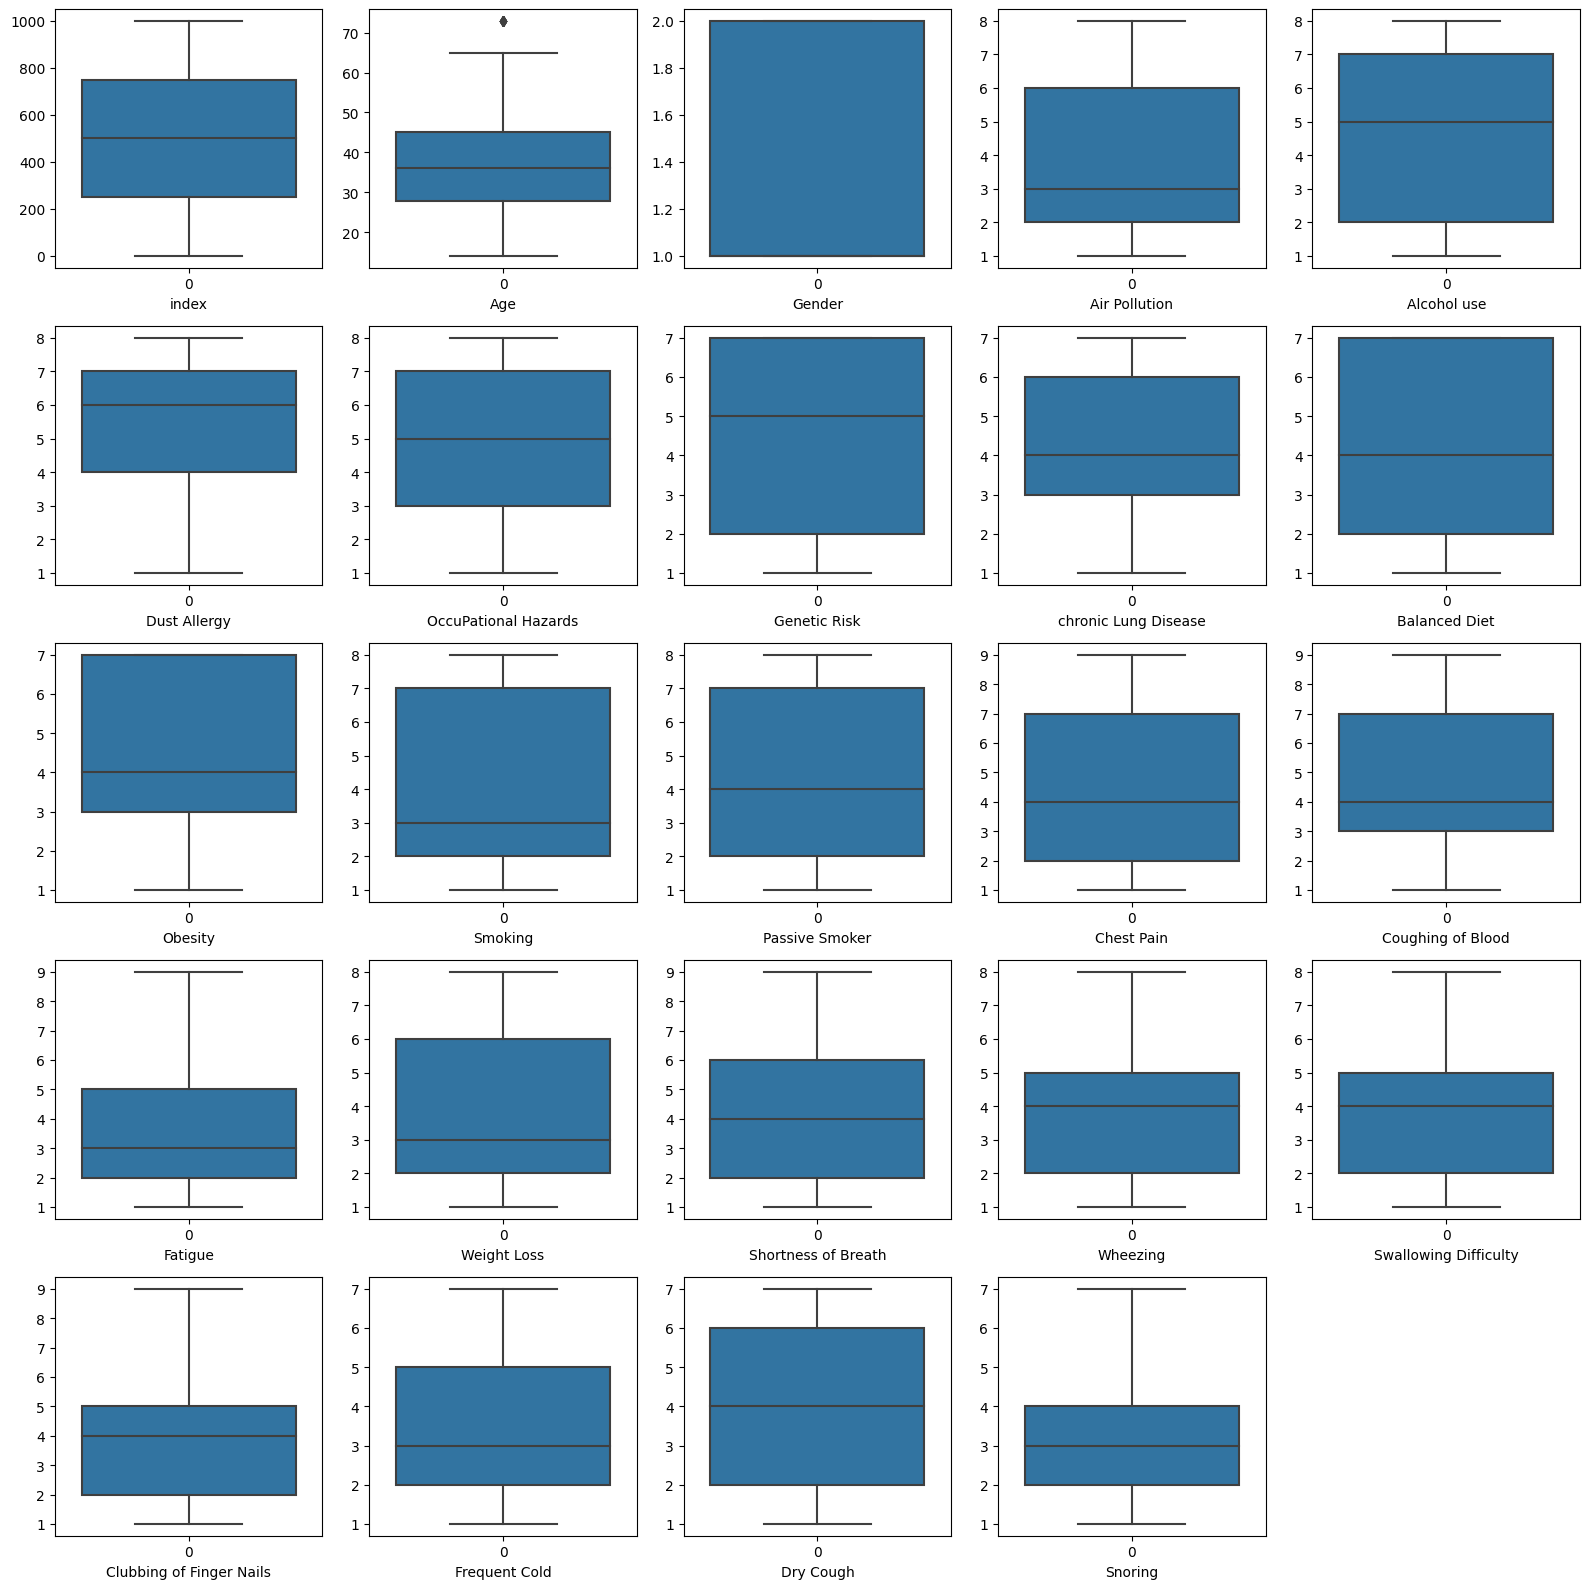

In [11]:
# Step 3
# Data Cleaning: Identifying Outliers

plt.figure(figsize=(16, 16))
for i, j in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5, 5, i+1)
    sns.boxplot(df[j])
    plt.xlabel(f"{j}")
    plt.tight_layout()
plt.subplots_adjust()
plt.show()


In [12]:
df=df.replace({'Level':{'Low': 1, 'Medium': 2, 'High': 3}})
df.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                        int64
dtype: object

In [13]:
df = df.drop(['index'], axis = 'columns', inplace=False)
df = df.drop(['Patient Id'], axis = 'columns',inplace=False)

In [14]:
# Step 3 : Data Preprocessing
# Before Train Test Split, split X(Input) & y(target) from the original Dataframe

X = df.drop(['Level'], axis = 'columns')
y = df['Level']

In [15]:
X.shape, y.shape

((1000, 23), (1000,))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
y_train.value_counts()

3    283
2    269
1    248
Name: Level, dtype: int64

In [18]:
y_test.value_counts()

3    82
2    63
1    55
Name: Level, dtype: int64

In [19]:
# Feature Scaling using StandardScaler
# Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_new_scaled = scaler.fit_transform(X_train)
X_test_new_scaled = scaler.transform(X_test)

In [20]:
#Applying Principal Component Analysis (PCA) for dimentionality Reduction

from sklearn.decomposition import PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_new_scaled)
X_test_pca = pca.transform(X_test_new_scaled)

In [21]:
X_train_pca.shape, X_test_pca.shape

((800, 14), (200, 14))

In [22]:
#Class Imbalance Handling using SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_pca, y_test)


In [23]:
X_train_resampled.shape, y_train_resampled.shape

((849, 14), (849,))

In [24]:
X_test_resampled.shape, y_test_resampled.shape

((246, 14), (246,))

In [25]:
y_train_resampled.value_counts()

2    283
3    283
1    283
Name: Level, dtype: int64

In [26]:
y_test_resampled.value_counts()

2    82
3    82
1    82
Name: Level, dtype: int64

In [27]:
# Step 4: Modelling - KNN, SVM, Decision Tree, Random Forest, Gradient Boosting
# KNN implementation

import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get the indices of the K-nearest training examples
        k_indices = np.argsort(distances)[:self.k]
        # Get the labels of the K-nearest training examples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


**1.KNN**
Description:
K-Nearest Neighbors (KNN) is a non-parametric, lazy algorithm used for classification and regression. It calculates the distance between a test sample and every training sample to find the K-nearest neighbors and assigns a class based on the majority class of its neighbors.

  Pros:
  Simple to understand and easy to implement.
  No assumptions about data distribution.
  Cons:
  Computationally expensive, especially with a large dataset.
  Sensitive to irrelevant features and the scale of the data.

  Key Hyperparameters:
  Number of Neighbors (K)
  Distance Metric (e.g., Euclidean, Manhattan)

**2. Support Vector Machines (SVM)**
Description:
Support Vector Machines (SVM) is a supervised learning algorithm used for classification and regression tasks. It works by finding the hyperplane that distinctly classifies the data points in a dataset.

  Pros:
  Works well with a clear margin of separation.
  Effective in high dimensional spaces.
  Cons:
  Sensitive to noise.
  Does not perform well when classes are overlapping.

  Key Hyperparameters:
  C (Regularization parameter)
  Kernel (linear, poly, rbf, sigmoid)
  Gamma (Kernel Coefficient)

**3. Decision Trees**
Description:
Decision Trees split the data into subsets based on the value of input features. This process is performed recursively, resulting in a tree-like model of decisions.

  Pros:
  Easy to understand and visualize.
  Requires little data preprocessing.
  Cons:
  Prone to overfitting.
  Sensitive to small variations in the data.

  Key Hyperparameters:
  Max Depth of Tree
  Minimum Samples Split
  Minimum Samples Leaf

**4. Random Forest**
Description:
Random Forest is an ensemble method that creates multiple decision trees and merges them together to get a more accurate and stable prediction.

  Pros:
  Reduces overfitting by averaging the result.
  Handles missing values and maintains accuracy for missing data.
  Cons:
  Complexity due to the construction of multiple trees.
  Requires more computational resources and time.

  Key Hyperparameters:
  Number of Estimators (trees)
  Max Depth of Tree
  Minimum Samples Split
  Minimum Samples Leaf


**5. Gradient Boosting**
Description:
Gradient Boosting is an ensemble technique where new models are built to correct the errors of existing models. Trees are built sequentially.

  Pros:
  Often provides predictive accuracy.
  Can work on different loss functions.
  Cons:
  Prone to overfitting.
  Requires careful tuning of different hyperparameters.

  Key Hyperparameters:
  Learning Rate
  Number of Estimators (trees)
  Max Depth of Tree
  Minimum Samples Split
  Minimum Samples Leaf

In [28]:
# Step 4
# Models - KNN, SVM, Decision Tree, Random Forest, Gradient Boosting
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Initialize the models
models = {
    "KNN": KNN(k=3),
    "SVM": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(min_samples_split=30),
    "GradientBoosting": GradientBoostingClassifier()
}

# Train, predict, and evaluate each model
for name, model in models.items():
    if name == "KNN":
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test_resampled)
    else:
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test_resampled)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test_resampled, y_pred)}")
    print(classification_report(y_test_resampled, y_pred))
    print("-"*50)


Model: KNN
Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        82
           3       1.00      1.00      1.00        82

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246

--------------------------------------------------
Model: SVM
Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        82
           3       1.00      1.00      1.00        82

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246

--------------------------------------------------
Model: DecisionTree
Accuracy: 0.9959349593495935
              precision    recall  f1

In [29]:
# Step 5: Hyperparameter Tuning - SVC and Decision Tree
# Random Search is performed and Hyper Parameter Tuning

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Setting up parameters for Decision Tree
dt_params = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": list(range(1,50)),
    "min_samples_split": list(range(2,50)),
    "min_samples_leaf": list(range(1,50))
}

# Setting up parameters for SVM
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Creating models
dt_model = DecisionTreeClassifier(random_state=0)
svm_model = SVC(random_state=0)

# Randomized Search for Decision Tree
dt_search = RandomizedSearchCV(dt_model, dt_params, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=0)
dt_search.fit(X_train_resampled, y_train_resampled)

# Randomized Search for SVM
svm_search = RandomizedSearchCV(svm_model, svm_params, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=0)
svm_search.fit(X_train_resampled, y_train_resampled)

# Best hyperparameters and accuracy for Decision Tree
print("Decision Tree Best Hyperparameters:")
print(dt_search.best_params_)
print(f"Decision Tree Training Accuracy: {accuracy_score(y_train_resampled, dt_search.best_estimator_.predict(X_train_resampled))}")
print(f"Decision Tree Test Accuracy: {accuracy_score(y_test_resampled, dt_search.best_estimator_.predict(X_test_resampled))}")

# Best hyperparameters and accuracy for SVM
print("\nSVM Best Hyperparameters:")
print(svm_search.best_params_)
print(f"SVM Training Accuracy: {accuracy_score(y_train_resampled, svm_search.best_estimator_.predict(X_train_resampled))}")
print(f"SVM Test Accuracy: {accuracy_score(y_test_resampled, svm_search.best_estimator_.predict(X_test_resampled))}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Decision Tree Best Hyperparameters:
{'splitter': 'random', 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_depth': 37, 'criterion': 'entropy'}
Decision Tree Training Accuracy: 1.0
Decision Tree Test Accuracy: 0.9959349593495935

SVM Best Hyperparameters:
{'kernel': 'poly', 'gamma': 1, 'C': 0.1}
SVM Training Accuracy: 1.0
SVM Test Accuracy: 1.0


**Decision Tree Classifier**

Best Hyperparameters:
Splitter: random
Min_samples_split: 6
Min_samples_leaf: 4
Max_depth: 37
Criterion: entropy
Training Accuracy: 1.0 (100%)
Test Accuracy: 0.996 (99.6%)

**Support Vector Machine (SVM)**

Best Hyperparameters:
Kernel: poly
Gamma: 1
C: 0.1
Training Accuracy: 1.0 (100%)
Test Accuracy: 1.0 (100%)

In [30]:
# Step 6: Result
import pandas as pd

# Adjust display settings
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None)  # Show full content of each cell

print("Step1 - Problem Statement")
print("Prediction of lung Cancer - Lung Cancer Prediction Air Pollution, Alcohol, Smoking & Risk of Lung Cancer")
print("This dataset contains information on patients with : \n lung cancer, including their age, gender,\n air pollution exposure, alcohol use, dust allergy,\n occupational hazards, genetic risk, chronic lung disease,\n balanced diet, obesity, smoking,\n passive smoker, chest pain, coughing of blood,\n fatigue, weight loss, shortness of breath,\n wheezing, swallowing difficulty, clubbing of finger nails and snoring")
print("")

print("Step2 - Data Collection")
print("https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/data")
print("")

print("Step3 - Data Cleaning, Validation, Preprocessing")
print("Handling Missing Values, Removing Duplicates, Correcting Data Errors")
print("")

print("Step4 - Modelling")

data = {
    'Algorithm': ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Summary': [
        'K-Nearest Neighbors (KNN) is a non-parametric, lazy algorithm used for classification and regression It calculates the distance between a test sample and every training sample to find the K-nearest neighbors and assigns a class based on the majority class of its neighbors' ,
        'Support Vector Machines (SVM) is a supervised learning algorithm used for classification and regression tasks. It works by finding the hyperplane that distinctly classifies the data points in a dataset',
        'Decision Trees split the data into subsets based on the value of input features. This process is performed recursively, resulting in a tree-like model of decisions',
        'Random Forest is an ensemble method that creates multiple decision trees and merges them together to get a more accurate and stable prediction',
        'Gradient Boosting is an ensemble technique where new models are built to correct the errors of existing models. Trees are built sequentially'
    ],
    'Pros': [
        'a) Simple to understand and easy to implement b) No assumptions about data distribution' ,
        'a) Works well with a clear margin of separation b) Effective in high dimensional spaces',
        'a) Easy to understand and visualize b) Requires little data preprocessing',
        'a) Reduces overfitting by averaging the result b) Handles missing values and maintains accuracy for missing data',
        'a) Often provides predictive accuracy b) Can work on different loss functions'
    ],
    'Cons': [
        'a) Computationally expensive, especially with a large dataset b) Sensitive to irrelevant features and the scale of the data' ,
        'Sensitive to noise b) Does not perform well when classes are overlapping',
        'a) Prone to overfitting b) Sensitive to small variations in the data',
        'a) Complexity due to the construction of multiple trees b) Requires more computational resources and time',
        'a) Prone to overfitting b) Requires careful tuning of different hyperparameters'
    ],
    'Hyperparameters': [
        'a) Number of Neighbors (K) b) Distance Metric (e.g., Euclidean, Manhattan)' ,
        'a) C (Regularization parameter) b) Kernel (linear, poly, rbf, sigmoid c) Gamma (Kernel Coefficient)',
        'a) Max Depth of Tree b) Minimum Samples Split c) Minimum Samples Leaf',
        'a) Number of Estimators (trees) b) Max Depth of Tree c) Minimum Samples Split d) Minimum Samples Leaf',
        'a) Learning Rate b) Number of Estimators (trees) c) Max Depth of Tree d) Minimum Samples Split e) Minimum Samples Leaf'
    ]
}

df = pd.DataFrame(data)
df


Step1 - Problem Statement
Prediction of lung Cancer - Lung Cancer Prediction Air Pollution, Alcohol, Smoking & Risk of Lung Cancer
This dataset contains information on patients with : 
 lung cancer, including their age, gender,
 air pollution exposure, alcohol use, dust allergy,
 occupational hazards, genetic risk, chronic lung disease,
 balanced diet, obesity, smoking,
 passive smoker, chest pain, coughing of blood,
 fatigue, weight loss, shortness of breath,
 wheezing, swallowing difficulty, clubbing of finger nails and snoring

Step2 - Data Collection
https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/data

Step4 - Modelling


,Algorithm,Summary,Pros,Cons,Hyperparameters
0,KNN,"K-Nearest Neighbors (KNN) is a non-parametric, lazy algorithm used for classification and regression It calculates the distance between a test sample and every training sample to find the K-nearest neighbors and assigns a class based on the majority class of its neighbors",a) Simple to understand and easy to implement b) No assumptions about data distribution,"a) Computationally expensive, especially with a large dataset b) Sensitive to irrelevant features and the scale of the data","a) Number of Neighbors (K) b) Distance Metric (e.g., Euclidean, Manhattan)"
1,SVM,Support Vector Machines (SVM) is a supervised learning algorithm used for classification and regression tasks. It works by finding the hyperplane that distinctly classifies the data points in a dataset,a) Works well with a clear margin of separation b) Effective in high dimensional spaces,Sensitive to noise b) Does not perform well when classes are overlapping,"a) C (Regularization parameter) b) Kernel (linear, poly, rbf, sigmoid c) Gamma (Kernel Coefficient)"
2,Decision Tree,"Decision Trees split the data into subsets based on the value of input features. This process is performed recursively, resulting in a tree-like model of decisions",a) Easy to understand and visualize b) Requires little data preprocessing,a) Prone to overfitting b) Sensitive to small variations in the data,a) Max Depth of Tree b) Minimum Samples Split c) Minimum Samples Leaf
3,Random Forest,Random Forest is an ensemble method that creates multiple decision trees and merges them together to get a more accurate and stable prediction,a) Reduces overfitting by averaging the result b) Handles missing values and maintains accuracy for missing data,a) Complexity due to the construction of multiple trees b) Requires more computational resources and time,a) Number of Estimators (trees) b) Max Depth of Tree c) Minimum Samples Split d) Minimum Samples Leaf
4,Gradient Boosting,Gradient Boosting is an ensemble technique where new models are built to correct the errors of existing models. Trees are built sequentially,a) Often provides predictive accuracy b) Can work on different loss functions,a) Prone to overfitting b) Requires careful tuning of different hyperparameters,a) Learning Rate b) Number of Estimators (trees) c) Max Depth of Tree d) Minimum Samples Split e) Minimum Samples Leaf
